# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
Train_data_file = "twitter-training-data.txt"
Dev_data_file = "twitter-dev-data.txt"
test_file1 = "twitter-test1.txt"
test_file2 = "twitter-test2.txt"
test_file3 = "twitter-test3.txt"

cols = ["tweet_id", "sentiment", "tweet_text"]

In [3]:
test_file2

'twitter-test2.txt'

## Defining a function for Visualizations

In [4]:

def plot_sentiment_distribution(data_file):
    # read the data into a Pandas DataFrame
    data = pd.read_csv(data_file, sep='\t', header=None, names=cols)

    # generate a frequency plot of the sentiment labels
    data['sentiment'].value_counts().plot(kind='bar', figsize=(10,2))
    plt.xlabel("Sentiment Label")
    plt.ylabel("Frequency")
    plt.title(data_file)
    plt.show()


## Defining a function for preprocessing

In [5]:
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, punctuations, and special characters
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove special characters
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    # Stem or lemmatize words
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into text
    text = ' '.join(tokens)
    return text

## Visualizing and Reading the Data

In [6]:
train_data = pd.read_csv(Train_data_file, sep='\t', header=None, names=cols)
train_data.head()

,tweet_id,sentiment,tweet_text
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...
1,796528524030124618,positive,@AaqibAfzaal Pakistan may be an Islamic countr...
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...


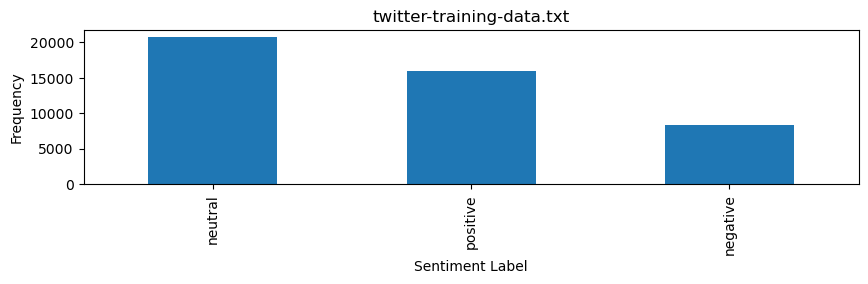

In [7]:
plot_sentiment_distribution("twitter-training-data.txt")

In [8]:
dev_data = pd.read_csv("twitter-dev-data.txt", sep='\t', header=None, names=cols)
dev_data.head()

,tweet_id,sentiment,tweet_text
0,262696992176304465,neutral,@Oirisheye Hey you! I'm gonna be in Dublin in ...
1,410734138242126311,positive,Literally so excited I'm going to a Sam Smith ...
2,237615985571058688,neutral,@WINDmobile Will there be an option to buy the...
3,90473590077188360,neutral,Our Little Ms. Philippines. 👏👏👏#littleMsPhilip...
4,450236582392850660,negative,"@AngryRaiderFan I know. This, TPP, expanded wa..."


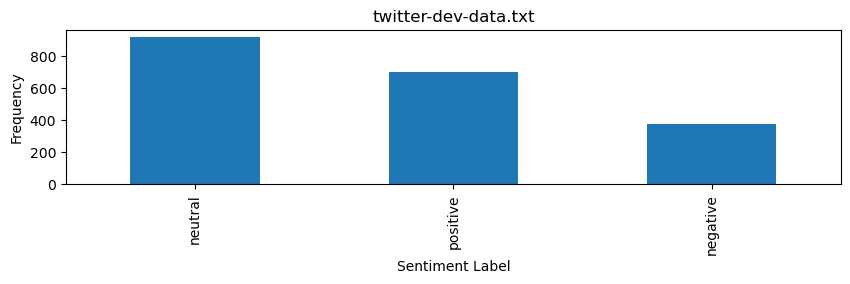

In [9]:
plot_sentiment_distribution("twitter-dev-data.txt")

In [10]:
test_data1 = pd.read_csv(test_file1, sep='\t', header=None, names=cols)
test_data1.head()

,tweet_id,sentiment,tweet_text
0,163361196206957578,neutral,Candids: Heading to the Chateau Marmont in Wes...
1,768006053969268950,negative,@Dont__KAY_me omg same I was reading it in sch...
2,742616104384772304,neutral,Watching MTV Hits! The Wanted Chasing the sun!
3,102313285628711403,neutral,"Bing one-ups knowledge graph, hires Encyclopae..."
4,653274888624828198,neutral,"On Thursday, concealed-carry gun license holde..."


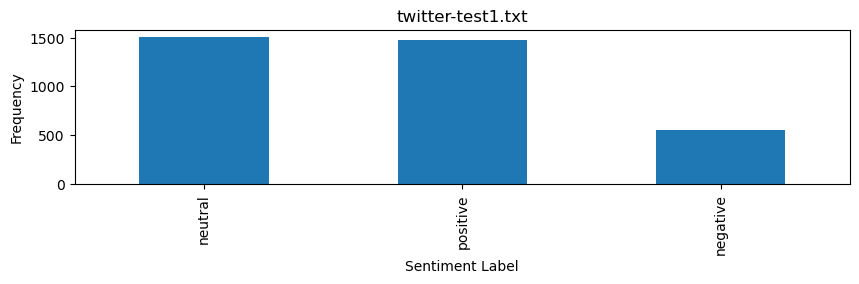

In [11]:
plot_sentiment_distribution("twitter-test1.txt")

In [12]:
test_data2 = pd.read_csv(test_file2, sep='\t', header=None, names=cols)
test_data2.head()

,tweet_id,sentiment,tweet_text
0,364323072843019872,neutral,Anybody going to that 4th of July pool party i...
1,802725906723804599,positive,The band enjoyed a day of sightseeing in Berli...
2,250002604645092879,positive,@wintersleep saw you play at Bluesfest last su...
3,510023256502999912,neutral,The Kee to Bala just got Drizzy: Intimate conc...
4,196017824322271173,neutral,Going to see Richard Dawkins &amp; Mehdi Hasan...


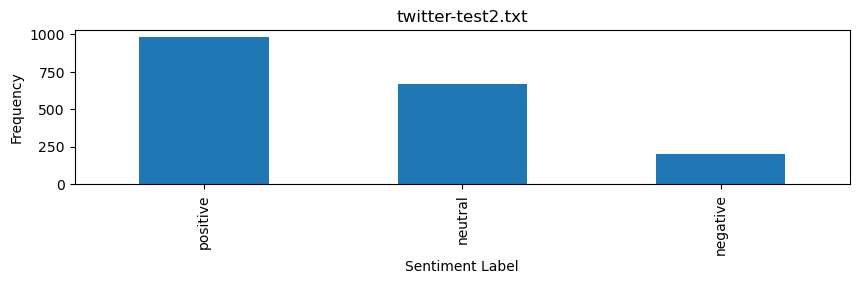

In [13]:
plot_sentiment_distribution("twitter-test2.txt")

In [14]:
test_data3 = pd.read_csv(test_file3, sep='\t', header=None, names=cols)
test_data3.head()

,tweet_id,sentiment,tweet_text
0,63115054245201986,neutral,@MoodieNathan Yeah dont think 8 or 9 like some...
1,192028253675695783,negative,Very Unfair: West Indies players to fly back o...
2,288283057533261865,positive,@TerryFoster971 @MikeValenti971 Ben Affleck is...
3,250327270502030803,neutral,Subscribe to Nash's channel to see when his ne...
4,573852753082126431,positive,Hull City manager Steve Bruce says his side is...


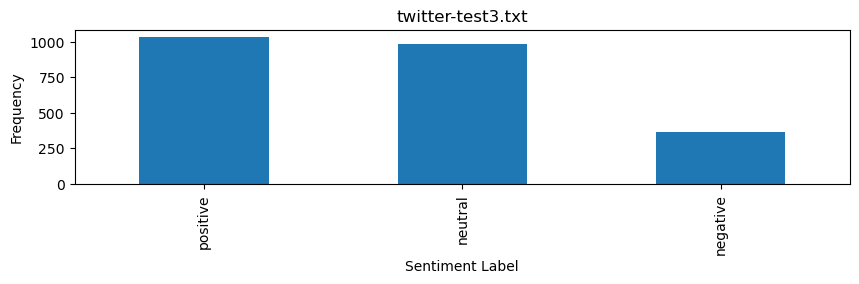

In [15]:
plot_sentiment_distribution("twitter-test3.txt")

## Applying preprocessing to Data

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('omw')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [18]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
train_data['clean_tweet_text'] = train_data['tweet_text'].apply(preprocess_text)
dev_data['clean_tweet_text'] = dev_data['tweet_text'].apply(preprocess_text)
test_data1['clean_tweet_text'] = test_data1['tweet_text'].apply(preprocess_text)
test_data2['clean_tweet_text'] = test_data2['tweet_text'].apply(preprocess_text)
test_data3['clean_tweet_text'] = test_data3['tweet_text'].apply(preprocess_text)

In [20]:
train_data

,tweet_id,sentiment,tweet_text,clean_tweet_text
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,felt privileged play foo fighter song guitar t...
1,796528524030124618,positive,@AaqibAfzaal Pakistan may be an Islamic countr...,pakistan may islamic country der lot true musl...
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,happy birthday coolest golfer bali may become ...
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,tmills going tucson th thursday
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,hmmmmm blacklivesmatter matter like rise kid d...
...,...,...,...,...
45021,660374218263817235,neutral,Sunday Cinema | Paul McCartney &amp; David Gil...,sunday cinema paul mccartney amp david gilmour...
45022,739323365061217061,neutral,"14-Aug The day of independence, The day of S...",aug day independence day sacrifice muslim vict...
45023,681369726697754114,positive,"9 September has arrived, which means Apple's n...",september arrived mean apple new iphone hour a...
45024,922217029064536808,positive,So I'll see you all tomorrow for some fun fill...,ill see tomorrow fun filled feeding league pro...


In [21]:
test_data1['clean_tweet_text']

0       candids heading chateau marmont west hollywood...
1                  kayme omg reading school pssas sat cry
2                     watching mtv hit wanted chasing sun
3       bing oneups knowledge graph hire encyclopaedia...
4       thursday concealedcarry gun license holder giv...
                              ...                        
3526    right could end picking sidney crosby st rou w...
3527    think continuing upa mamata chief minister tak...
3528    lady come throw as nigga come throw cash hypel...
3529                         going laidback luke tomorrow
3530    center stage mark gordon live tues pm pst kxlu...
Name: clean_tweet_text, Length: 3531, dtype: object

In [27]:
train_data.drop(train_data[train_data['sentiment'] == 'neutral'].index, inplace=True)
dev_data.drop(dev_data[dev_data['sentiment'] == 'neutral'].index, inplace=True)
test_data1.drop(test_data1[test_data1['sentiment'] == 'neutral'].index, inplace=True)
test_data2.drop(test_data2[test_data2['sentiment'] == 'neutral'].index, inplace=True)
test_data3.drop(test_data3[test_data3['sentiment'] == 'neutral'].index, inplace=True)

In [28]:
train_data

,tweet_id,sentiment,tweet_text,clean_tweet_text
0,335104872099066692,positive,Felt privileged to play Foo Fighters songs on ...,felt privileged play foo fighter song guitar t...
1,796528524030124618,positive,@AaqibAfzaal Pakistan may be an Islamic countr...,pakistan may islamic country der lot true musl...
2,760964834217238632,positive,Happy Birthday to the coolest golfer in Bali! ...,happy birthday coolest golfer bali may become ...
3,147713180324524046,negative,@SimpplyA TMILLS is going to Tucson! But the 2...,tmills going tucson th thursday
4,732302280474120023,negative,Hmmmmm where are the #BlackLivesMatter when ma...,hmmmmm blacklivesmatter matter like rise kid d...
...,...,...,...,...
45017,638667710398891068,positive,Someone should tell frank ocean that tomorrow ...,someone tell frank ocean tomorrow would great ...
45018,103623466461181268,positive,All I know is I'm going to see Sam Smith tomor...,know im going see sam smith tomorrow like hone...
45019,545294706128695213,positive,@JBcommentator Zlatan has many career highligh...,zlatan many career highlightsi think may trump...
45023,681369726697754114,positive,"9 September has arrived, which means Apple's n...",september arrived mean apple new iphone hour a...


In [22]:
# test_data1['clean_tweet_text']
# test_data2['clean_tweet_text']
# test_data3['clean_tweet_text']

## Train test Splits

In [23]:
# X_train, X_val, y_train, y_val = train_test_split(train_data['clean_tweet_text'], train_data['sentiment'], test_size=0.2, random_state=42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['clean_tweet_text'])
X_dev = vectorizer.transform(dev_data['clean_tweet_text'])
X_test = vectorizer.transform(test_data1['clean_tweet_text'])

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_data['sentiment'])
y_dev = le.transform(dev_data['sentiment'])

## TRAINING FOR NAIVE BAYS

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
target_names = le.classes_.astype(str).tolist()
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_dev_pred = clf.predict(X_dev)
print(classification_report(y_dev, y_dev_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.90      0.52      0.66       378
    positive       0.79      0.97      0.87       703

    accuracy                           0.81      1081
   macro avg       0.84      0.74      0.76      1081
weighted avg       0.83      0.81      0.80      1081



In [33]:
test_data1['sentiment_pred'] = clf.predict(vectorizer.transform(test_data1['clean_tweet_text']))
test_data2['sentiment_pred'] = clf.predict(vectorizer.transform(test_data2['clean_tweet_text']))
test_data3['sentiment_pred'] = clf.predict(vectorizer.transform(test_data3['clean_tweet_text']))

In [34]:
test_data1["sentiment"] = le.fit_transform(test_data1["sentiment"])
test_data2["sentiment"] = le.fit_transform(test_data2["sentiment"])
test_data3["sentiment"] = le.fit_transform(test_data3["sentiment"])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(test_data1["sentiment"], test_data1["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.91      0.19      0.32       557
    positive       0.76      0.99      0.86      1470

    accuracy                           0.77      2027
   macro avg       0.84      0.59      0.59      2027
weighted avg       0.80      0.77      0.71      2027



In [36]:
print(classification_report(test_data2["sentiment"], test_data2["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.85      0.08      0.15       202
    positive       0.84      1.00      0.91       982

    accuracy                           0.84      1184
   macro avg       0.85      0.54      0.53      1184
weighted avg       0.84      0.84      0.78      1184



In [37]:
print(classification_report(test_data3["sentiment"], test_data3["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.74      0.18      0.30       363
    positive       0.77      0.98      0.86      1033

    accuracy                           0.77      1396
   macro avg       0.75      0.58      0.58      1396
weighted avg       0.76      0.77      0.72      1396



<AxesSubplot:>

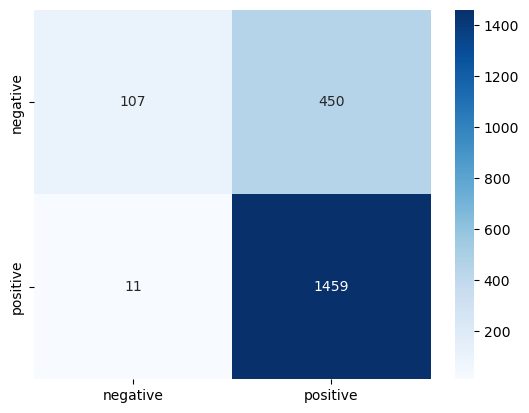

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predicted labels
y_true = test_data1["sentiment"]
y_pred = test_data1["sentiment_pred"]

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=target_names, yticklabels=target_names)

<AxesSubplot:>

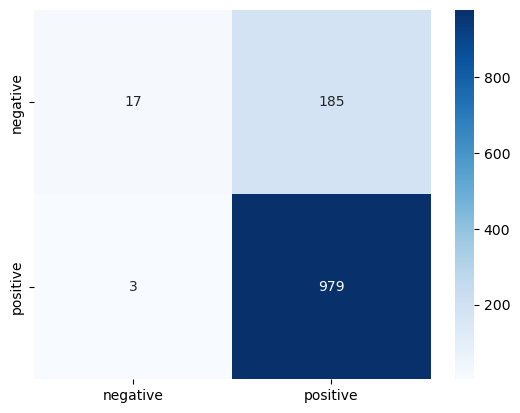

In [39]:
y_true = test_data2["sentiment"]
y_pred = test_data2["sentiment_pred"]

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=target_names, yticklabels=target_names)


<AxesSubplot:>

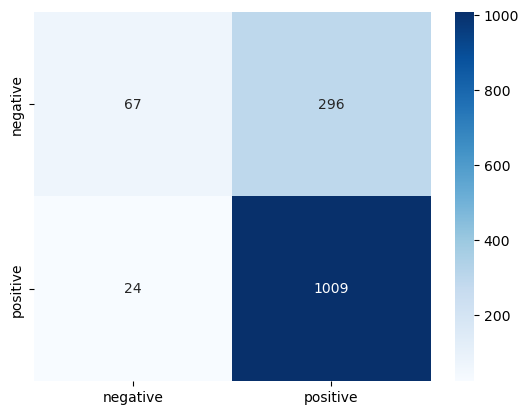

In [40]:
# Get true labels and predicted labels
y_true = test_data3["sentiment"]
y_pred = test_data3["sentiment_pred"]

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=target_names, yticklabels=target_names)


## SVM

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# initialize SVM model with linear kernel
svm_model = SVC(kernel='linear')

# train the model on training data
svm_model.fit(X_train, y_train)

# predict on development set
y_dev_pred = svm_model.predict(X_dev)

# print classification report
target_names = le.classes_.astype(str).tolist()
print(classification_report(y_dev, y_dev_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.86      0.79      0.82       378
    positive       0.89      0.93      0.91       703

    accuracy                           0.88      1081
   macro avg       0.87      0.86      0.86      1081
weighted avg       0.88      0.88      0.88      1081



In [42]:
test_data1['sentiment_pred'] = svm_model.predict(vectorizer.transform(test_data1['clean_tweet_text']))
test_data2['sentiment_pred'] = svm_model.predict(vectorizer.transform(test_data2['clean_tweet_text']))
test_data3['sentiment_pred'] = svm_model.predict(vectorizer.transform(test_data3['clean_tweet_text']))

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_data1["sentiment"], test_data1["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.76      0.58      0.66       557
    positive       0.85      0.93      0.89      1470

    accuracy                           0.83      2027
   macro avg       0.81      0.75      0.77      2027
weighted avg       0.83      0.83      0.83      2027



In [44]:
print(classification_report(test_data2["sentiment"], test_data2["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.75      0.52      0.62       202
    positive       0.91      0.96      0.94       982

    accuracy                           0.89      1184
   macro avg       0.83      0.74      0.78      1184
weighted avg       0.88      0.89      0.88      1184



In [45]:
print(classification_report(test_data3["sentiment"], test_data3["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.66      0.61      0.63       363
    positive       0.87      0.89      0.88      1033

    accuracy                           0.82      1396
   macro avg       0.77      0.75      0.76      1396
weighted avg       0.81      0.82      0.82      1396



<AxesSubplot:>

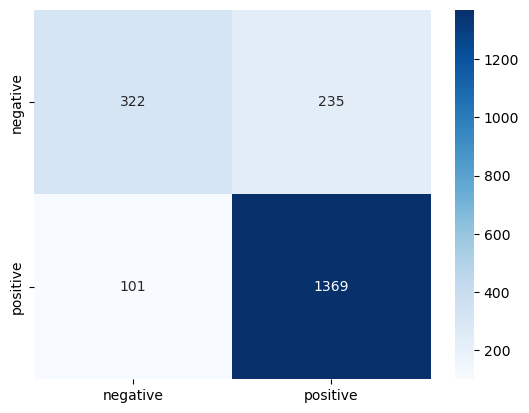

In [46]:
# Get true labels and predicted labels
y_true = test_data1["sentiment"]
y_pred = test_data1["sentiment_pred"]

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=target_names, yticklabels=target_names)


<AxesSubplot:>

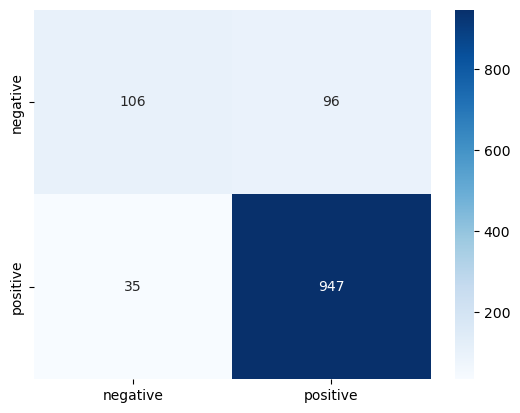

In [47]:
# Get true labels and predicted labels
y_true = test_data2["sentiment"]
y_pred = test_data2["sentiment_pred"]

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=target_names, yticklabels=target_names)


<AxesSubplot:>

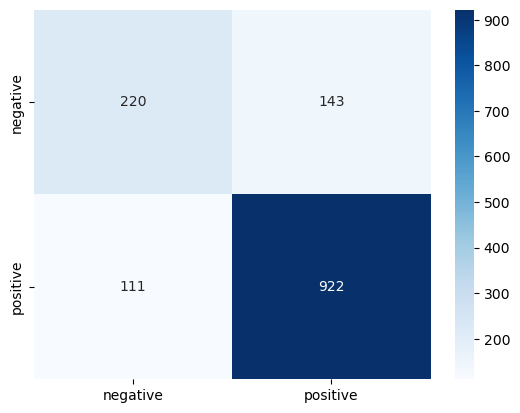

In [48]:
# Get true labels and predicted labels
y_true = test_data3["sentiment"]
y_pred = test_data3["sentiment_pred"]

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=target_names, yticklabels=target_names)


In [ ]:
# !pip uninstall torchtext

In [ ]:
# !pip install torchtext==0.10.0

In [49]:
import torch
from torchtext import data, datasets
import torchtext
from torchtext.vocab import Vocab
print(torchtext.__version__)


0.10.0


In [50]:
from torchtext.legacy import data


In [ ]:
# !pip install spacy

In [ ]:
# !python -m spacy download en_core_web_sm

In [51]:
import torch
import torch.nn.functional as F
from torchtext import data
from torchtext import datasets
import time
import random

torch.backends.cudnn.deterministic = True

In [60]:
TEXT = data.Field(tokenize='spacy')
LABEL = data.LabelField(dtype=torch.float)

# create the training, validation, and test datasets
train_data = data.TabularDataset(
    path='twitter-training-data.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', LABEL)]
)

dev_data = data.TabularDataset(
    path='twitter-dev-data.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', LABEL)]
)

test_data1 = data.TabularDataset(
    path='twitter-test1.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', None)]
)

test_data2 = data.TabularDataset(
    path='twitter-test2.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', None)]
)

test_data3 = data.TabularDataset(
    path='twitter-test3.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', None)]
)

In [61]:
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)

VOCABULARY_SIZE = 5000
LEARNING_RATE = 1e-4
BATCH_SIZE = 128
NUM_EPOCHS = 15
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1

In [62]:
# !pip install torchtext
# from torchtext.data import Field, LabelField
from torchtext.legacy.data import Field, LabelField, BucketIterator
from torchtext import datasets
from torchtext.datasets import IMDB
from torchtext.legacy import data

In [63]:
train_data = train_data
valid_data = dev_data
test_data = test_data1


In [64]:
train_data

In [65]:
train_loader, valid_loader, test_loader = torchtext.legacy.data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size=BATCH_SIZE, 
    device=DEVICE,
    sort_key=lambda x: len(x.text)
)

In [66]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_length):

        #[sentence len, batch size] => [sentence len, batch size, embedding size]
        embedded = self.embedding(text)
        
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, text_length)
        
        #[sentence len, batch size, embedding size] => 
        #  output: [sentence len, batch size, hidden size]
        #  hidden: [1, batch size, hidden size]
        packed_output, (hidden, cell) = self.rnn(packed)
        
        return self.fc(hidden.squeeze(0)).view(-1)

In [67]:
# define the path to the GloVe embedding file
glove_path = 'glove.6B.100d.txt'

# load the pre-trained embeddings
vectors = torchtext.vocab.Vectors(name=glove_path)

# build the vocabulary using the training data and the pre-trained embeddings
TEXT.build_vocab(train_data, max_size=VOCABULARY_SIZE, vectors=vectors, unk_init=torch.Tensor.normal_)
LABEL.build_vocab(train_data)

# get the input dimension from the length of the vocabulary
INPUT_DIM = len(TEXT.vocab)

# create the model
torch.manual_seed(RANDOM_SEED)
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [68]:
def compute_binary_accuracy(model, data_loader, device):
    model.eval()
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(data_loader):
            text, text_lengths = batch_data.text
            logits = model(text, text_lengths)
            predicted_labels = (torch.sigmoid(logits) > 0.5).long()
            num_examples += batch_data.label.size(0)
            correct_pred += (predicted_labels == batch_data.label.long()).sum()
        return correct_pred.float()/num_examples * 100

In [ ]:
# print(batch_data.fields)

In [ ]:
# type(batch_data.clean_tweet_text)

In [69]:
# def train(model, iterator, optimizer, criterion):
#     model.train()
#     for batch in iterator:
#         text, text_lengths = batch.text
#         batch_size = text.shape[1]  # Get the batch size
        
#         # Reshape text_lengths to match batch size
#         text_lengths = text_lengths.view(-1)
        
#         optimizer.zero_grad()
#         predictions = model(text, text_lengths).squeeze(1)
#         loss = criterion(predictions, batch.label.float())
#         loss.backward()
#         optimizer.step()

def train(model, iterator, optimizer, criterion):
    model.train()
    model.embedding.weight.requires_grad = False  # Freeze the embedding layer
    for batch in iterator:
        text, text_lengths = batch.text
        batch_size = text.shape[1]  # Get the batch size
        
        # Reshape text_lengths to match batch size
        text_lengths = text_lengths.view(-1)
        
        optimizer.zero_grad()
        predictions = model(text, text_lengths).squeeze(1)
        loss = criterion(predictions, batch.label.float())
        loss.backward()
        optimizer.step()

In [70]:
import torch
from torch.utils.data import DataLoader

def collate_fn(batch):
    texts, labels = zip(*batch)
    # Convert the text data into padded sequences of the same length
    text_lengths = [len(text) for text in texts]
    max_length = max(text_lengths)
    padded_texts = []
    for text in texts:
        padded_text = text + [0] * (max_length - len(text))
        padded_texts.append(padded_text)
    # Convert the labels into a tensor
    labels = torch.tensor(labels)
    # Convert the padded text sequences into a tensor
    padded_texts = torch.tensor(padded_texts)
    # Return the padded text sequences and labels
    return padded_texts, text_lengths, labels

# Create a DataLoader with the collate_fn
train_loader = DataLoader(train_data, batch_size=128, collate_fn=collate_fn)


In [84]:
import transformers
import torch

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = transformers.DistilBertTokenizer.from_pretrained(model_name)
model = transformers.DistilBertForSequenceClassification.from_pretrained(model_name)

# Define a function to predict the sentiment of a given sentence
def predict_sentiment(sentence):
    # Tokenize the sentence
    tokens = tokenizer.tokenize(sentence)
    # Convert the tokens to numerical IDs
    indexed_tokens = [tokenizer.cls_token_id] + tokenizer.convert_tokens_to_ids(tokens) + [tokenizer.sep_token_id]
    # Convert the sequence of IDs to a tensor
    tokens_tensor = torch.tensor([indexed_tokens])
    # Use the model to predict the sentiment
    with torch.no_grad():
        output = model(tokens_tensor)
        logits = output[0][0]
        probabilities = torch.softmax(logits, dim=0)
        prediction = torch.argmax(probabilities).item()
    return prediction

# Test the function on some example sentences
sentences = [
    "This movie was terrible.", # negative
    "I loved this book!", # positive
    "The food was average.", # neutral
    "The service at this restaurant was terrible.", # negative
    "I had a fantastic time on my vacation.", # positive
    "I'm so disappointed with this product.", # negative
    "I'm really impressed with the customer service.", # positive
    "The weather today is absolutely gorgeous.", # positive
    "This traffic is driving me crazy.", # negative
    "I don't like this new song.", # negative
    "The museum exhibit was fascinating.", # positive
    "I feel so relaxed after my massage.", # positive
    "This store has great sales.", # positive
    "I can't believe how expensive this is.", # negative
    "The performance was lackluster.", # negative
    "I'm really enjoying this book so far.", # positive
    "This app keeps crashing on me.", # negative
    "The coffee here is just okay.", # neutral
    "I'm so excited for the concert tonight!", # positive
    "The hotel room was dirty and uncomfortable." # negative
]

labels = ['negative', 'positive', 'neutral', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'neutral', 'positive', 'negative']
# Make predictions for each sentence
predicted_labels = []
for sentence in sentences:
    prediction = predict_sentiment(sentence)
    predicted_label = 'positive' if prediction == 1 else 'negative'
    predicted_labels.append(predicted_label)
    print(f"{sentence} --> {predicted_label}")

This movie was terrible. --> negative
I loved this book! --> positive
The food was average. --> positive
The service at this restaurant was terrible. --> negative
I had a fantastic time on my vacation. --> positive
I'm so disappointed with this product. --> negative
I'm really impressed with the customer service. --> positive
The weather today is absolutely gorgeous. --> positive
This traffic is driving me crazy. --> positive
I don't like this new song. --> negative
The museum exhibit was fascinating. --> positive
I feel so relaxed after my massage. --> positive
This store has great sales. --> positive
I can't believe how expensive this is. --> negative
The performance was lackluster. --> negative
I'm really enjoying this book so far. --> positive
This app keeps crashing on me. --> positive
The coffee here is just okay. --> positive
I'm so excited for the concert tonight! --> positive
The hotel room was dirty and uncomfortable. --> negative


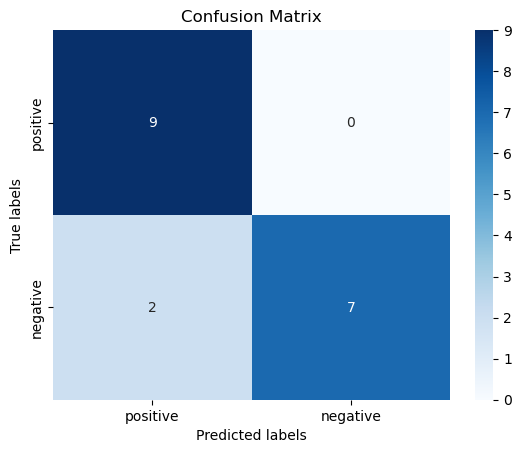

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, predicted_labels, labels=['positive', 'negative'])
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['positive', 'negative'])
ax.yaxis.set_ticklabels(['positive', 'negative'])
plt.show()